In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [2]:
np.random.seed(42)
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'F'), ('E', 'F')]

# edge_data = []
# for start, end in edges:
#     distance = np.random.randint(5, 11)
#     terrain = np.random.randint(1, 4)
#     material_cost = np.round(np.random.uniform(50, 100), 2)
#     labor_cost = np.round(np.random.uniform(20, 50), 2)
#     edge_data.append([start, end, distance, terrain, material_cost, labor_cost])
edge_data = [
        ['A', 'B', 5, 1, 70, 40],
        ['A', 'C', 7, 2, 65, 35],
        ['B', 'D', 6, 1, 80, 45],
        ['C', 'D', 3, 3, 90, 50],
        ['C', 'E', 4, 2, 55, 25],
        ['D', 'F', 8, 1, 60, 30],
        ['E', 'F', 5, 2, 75, 40]
    ]
df = pd.DataFrame(edge_data, columns=[
    'start', 'end', 'distance', 'terrain_difficulty', 'material_cost_per_unit', 'labor_cost_per_unit'
])
df


,start,end,distance,terrain_difficulty,material_cost_per_unit,labor_cost_per_unit
0,A,B,5,1,70,40
1,A,C,7,2,65,35
2,B,D,6,1,80,45
3,C,D,3,3,90,50
4,C,E,4,2,55,25
5,D,F,8,1,60,30
6,E,F,5,2,75,40


In [3]:
G = nx.Graph()
for idx, row in df.iterrows():
    cost_per_km = row['material_cost_per_unit'] + row['labor_cost_per_unit']
    weight = row['distance']   * cost_per_km
    G.add_edge(
        row['start'], row['end'],
        weight=weight,
        distance=row['distance'],
        terrain=row['terrain_difficulty'],
        material_cost=row['material_cost_per_unit'],
        labor_cost=row['labor_cost_per_unit']
    )


In [4]:
start_node = widgets.Dropdown(options=list(G.nodes), description='Start:', value='A')
end_node = widgets.Dropdown(options=list(G.nodes), description='End:', value='F')
display(start_node, end_node)


Dropdown(description='Start:', options=('A', 'B', 'C', 'D', 'E', 'F'), value='A')

Dropdown(description='End:', index=5, options=('A', 'B', 'C', 'D', 'E', 'F'), value='F')

In [5]:
source = start_node.value
target = end_node.value

def calculate_path_cost(path):
    cost = 0
    for i in range(len(path) - 1):
        u, v = path[i], path[i+1]
        edge = G[u][v]
        cost += edge['distance']  * (edge['material_cost'] + edge['labor_cost'])
    return cost

all_paths = list(nx.all_simple_paths(G, source=source, target=target))
path_costs = [(p, calculate_path_cost(p)) for p in all_paths]
path_costs.sort(key=lambda x: x[1])

# Display top 3 paths
print(f"📍 All Paths from {source} to {target}:\n")
for i, (p, c) in enumerate(path_costs[:3]):
    tag = "Optimal" if i == 0 else ""
    print(f"{i+1}. {' ➝ '.join(p)}   Cost: ₹{c*100:.2f} {tag}")

# Extract the optimal path
path = path_costs[0][0]
total_cost = path_costs[0][1]


📍 All Paths from A to F:

1. A ➝ C ➝ E ➝ F   Cost: ₹159500.00 Optimal
2. A ➝ C ➝ D ➝ F   Cost: ₹184000.00 
3. A ➝ B ➝ D ➝ F   Cost: ₹202000.00 


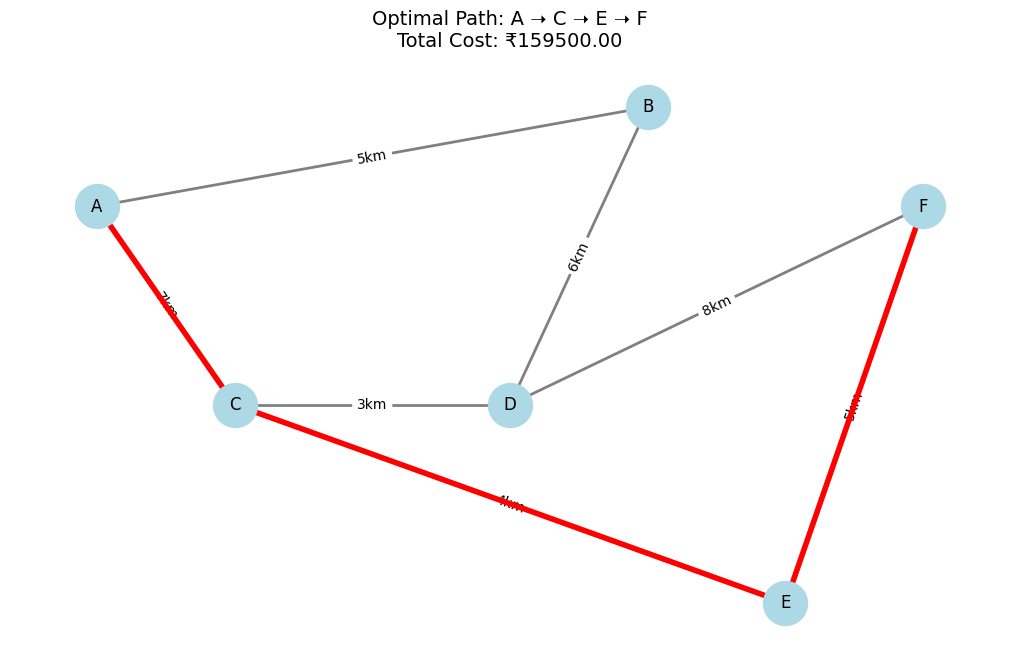

In [6]:
pos = {
    'A': (100, 300),
    'B': (500, 350),
    'C': (200, 200),
    'D': (400, 200),
    'E': (600, 100),
    'F': (700, 300)
}

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, edge_color='gray', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v): f"{G[u][v]['distance']}km" for u,v in G.edges()})

# Draw the optimal path in red
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4)
plt.title(f"Optimal Path: {' ➝ '.join(path)}\nTotal Cost: ₹{total_cost*100:.2f}", fontsize=14)
plt.axis('off')
plt.show()
